## California house price prediction

### Load the data and explore it

In [4]:
import pandas as pd
housing = pd.read_csv(r"E:\GIS_Data\file_formats\CSV\housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# find unique values in ocean proximity column
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#describe all numerical rows - basic stats
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004717640F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000004717C4A470>]], dtype=object)

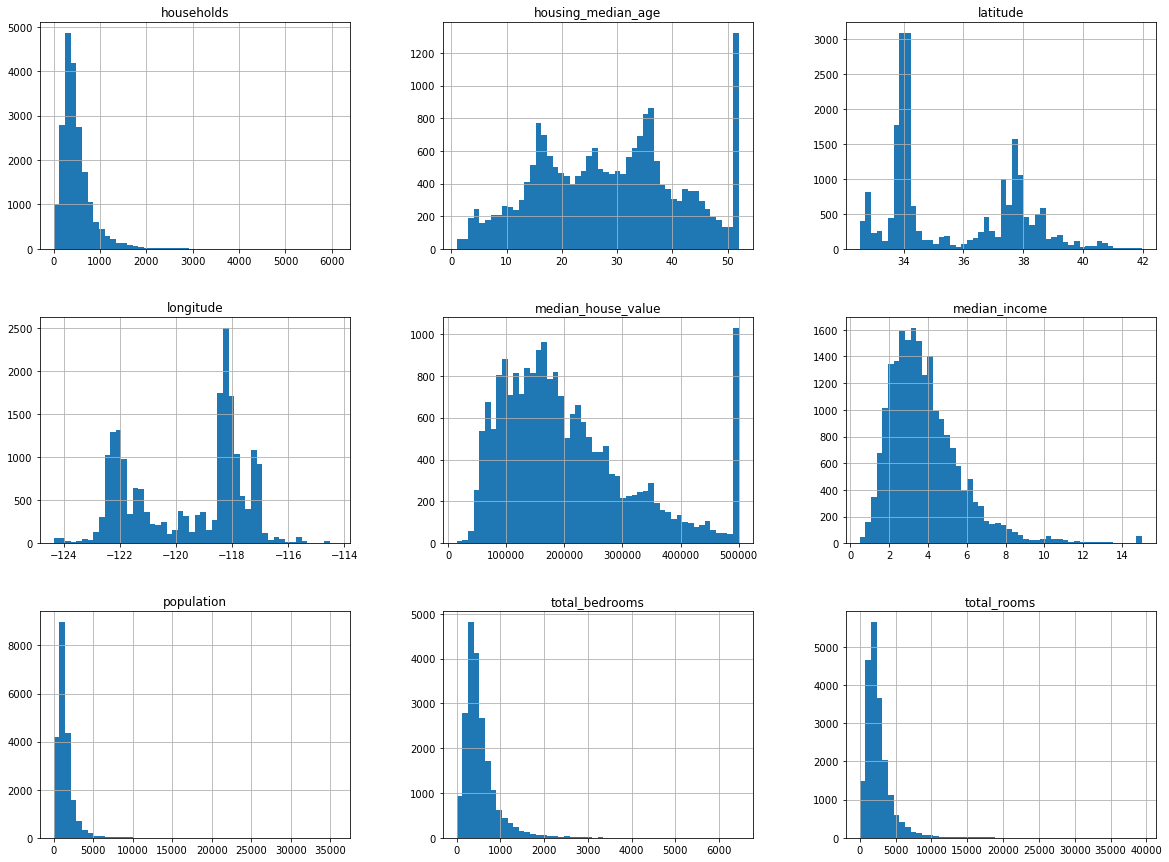

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Create a test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


## Do stratified sampling
Assuming median_income is an important predictor, we need to categorize it. It is important to build categories such that there are a sufficient number of data points in each strata, else the stratum's importance is biased. To make sure, we need not too many strata (like it is now with median income) and strata are relatively wide.

In [14]:
# scale the median income down by dividing it by 1.5 and rounding up those which are greater than 5 to 5.0
import numpy as np
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5) #up round to integers

#replace those with values > 5 with 5.0, values < 5 remain as is
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

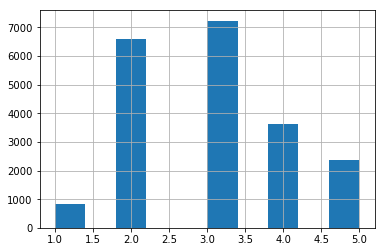

In [15]:
housing['income_cat'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Now remove the `income_cat` field used for this sampling. We will learn on the `median_income` data instead

In [27]:
for _temp in (strat_test_set, strat_train_set):
    _temp.drop("income_cat", axis=1, inplace=True)

In [38]:
# Write the train and test data to disk
strat_test_set.to_csv('./housing_strat_test.csv')
strat_train_set.to_csv('./housing_strat_train.csv')

## Exploratory data analysis

C:\Anaconda3\envs\ml\lib\site-packages\pandas\plotting\_core.py:196: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


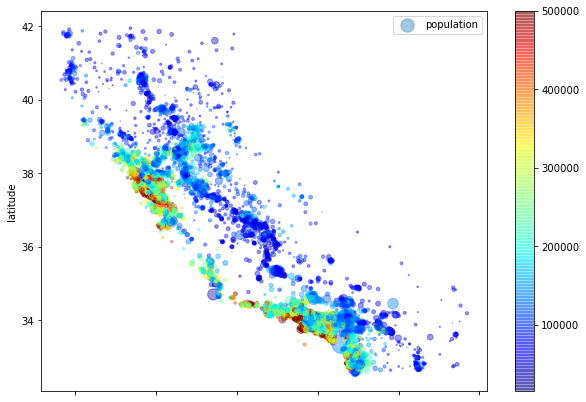

In [37]:
strat_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=strat_train_set['population']/100,
                    label='population', figsize=(10,7), color=strat_train_set['median_house_value'], 
                     cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()